                       Name                                          Image_URL
0       Abzan Battle Priest  http://gatherer.wizards.com/Handlers/Image.ash...
1            Abzan Falconer  http://gatherer.wizards.com/Handlers/Image.ash...
2            Ainok Bond-Kin  http://gatherer.wizards.com/Handlers/Image.ash...
3           Alabaster Kirin  http://gatherer.wizards.com/Handlers/Image.ash...
4         Dazzling Ramparts  http://gatherer.wizards.com/Handlers/Image.ash...
..                      ...                                                ...
147  Sage of the Inward Eye                                                NaN
148    Sidisi, Brood Tyrant                                                NaN
149             Siege Rhino                                                NaN
150       Surrak Dragonclaw                                                NaN
151       Zurgo Helmsmasher                                                NaN

[152 rows x 2 columns]
<PIL.PngImagePlugin.PngImage

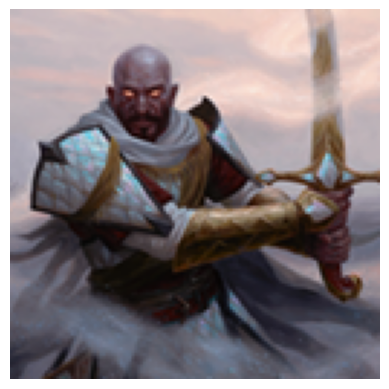

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import pandas as pd
import os
import matplotlib.pyplot as plt

# Define a dataset class
class CustomDataset(Dataset):
    def __init__(self, dataframe, image_dir, transform=None):
        self.dataframe = dataframe
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = os.path.join(self.image_dir, self.dataframe.iloc[idx, 0] + ".png")
        image = Image.open(img_name)
        if self.transform:
            image = self.transform(image)
        return image

# Load your dataframe
# Assuming your dataframe has columns "table_name" and "image_path"
# Adjust accordingly if the column names are different
df = pd.read_csv("dataset\\raw\\TKT.csv")
print(df)

# Create an instance of the CustomDataset
dataset = CustomDataset(dataframe=df, image_dir="dataset/cropped_images")

# Call the __getitem__ method for the first item in the dataset
image = dataset.__getitem__(0)

print(image)

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

In [2]:
print(dataset.dataframe)
print(dataset.image_dir)


                       Name                                          Image_URL
0       Abzan Battle Priest  http://gatherer.wizards.com/Handlers/Image.ash...
1            Abzan Falconer  http://gatherer.wizards.com/Handlers/Image.ash...
2            Ainok Bond-Kin  http://gatherer.wizards.com/Handlers/Image.ash...
3           Alabaster Kirin  http://gatherer.wizards.com/Handlers/Image.ash...
4         Dazzling Ramparts  http://gatherer.wizards.com/Handlers/Image.ash...
..                      ...                                                ...
147  Sage of the Inward Eye                                                NaN
148    Sidisi, Brood Tyrant                                                NaN
149             Siege Rhino                                                NaN
150       Surrak Dragonclaw                                                NaN
151       Zurgo Helmsmasher                                                NaN

[152 rows x 2 columns]
dataset/cropped_images


In [3]:
# Define transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize images to a standard size
    transforms.ToTensor(),           # Convert images to tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the images
])

# Create a custom dataset instance
dataset = CustomDataset(dataframe=df, image_dir="dataset/cropped_images", transform=transform)
print(dataset.transform)


Compose(
    Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)


In [4]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

model_id = "stabilityai/stable-diffusion-2-1"

# Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

prompt = "yoda-pokemon"
image = pipe(prompt).images[0]
    
image.save("yoda-pokemon.png") 

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

d:\Projets\ai-art-generator\.venv\Lib\site-packages\diffusers\models\attention_processor.py:1279: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  hidden_states = F.scaled_dot_product_attention(


In [7]:
prompt = "yoda-pokemon"
image = pipe(prompt).images[0]
    
image.save("yoda-pokemon.png") 

  0%|          | 0/50 [00:00<?, ?it/s]

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

# Split the dataframe into training and validation sets
train_df = df.sample(frac=0.8, random_state=42)
val_df = df.drop(train_df.index)
print(train_df)
print(val_df)

                       Name                                          Image_URL
68           Summit Prowler  http://gatherer.wizards.com/Handlers/Image.ash...
147  Sage of the Inward Eye                                                NaN
96     Butcher of the Horde  http://gatherer.wizards.com/Handlers/Image.ash...
82              Sagu Archer  http://gatherer.wizards.com/Handlers/Image.ash...
135           Ankle Shanker                                                NaN
..                      ...                                                ...
119       Zurgo Helmsmasher  http://gatherer.wizards.com/Handlers/Image.ash...
46        Mer-Ek Nightblade  http://gatherer.wizards.com/Handlers/Image.ash...
120     Witness of the Ages  http://gatherer.wizards.com/Handlers/Image.ash...
61           Horde Ambusher  http://gatherer.wizards.com/Handlers/Image.ash...
149             Siege Rhino                                                NaN

[122 rows x 2 columns]
                           N

In [14]:
# Create data loaders for the training and validation sets
train_dataset = CustomDataset(dataframe=train_df, image_dir="dataset/cropped_images", transform=transform)
val_dataset = CustomDataset(dataframe=val_df, image_dir="dataset/cropped_images", transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(pipe.parameters(), lr=0.001)

# Train the model
num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
pipe.to(device)

for epoch in range(num_epochs):
    pipe.train()
    train_loss = 0.0
    
    for images in train_loader:
        images = images.to(device)
        outputs = pipe(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * images.size(0)
    
    train_loss /= len(train_loader.dataset)
    
    # Evaluate the model on the validation set
    pipe.eval()
    val_loss = 0.0
    correct = 0
    
    with torch.no_grad():
        for images in val_loader:
            images = images.to(device)
            outputs = pipe(images)
            loss = criterion(outputs, labels)
            
            val_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
    
    val_loss /= len(val_loader.dataset)
    accuracy = correct / len(val_loader.dataset)
    
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {accuracy:.4f}")


AttributeError: 'StableDiffusionPipeline' object has no attribute 'parameters'

In [15]:
import torch.nn as nn

class PipelineWrapper(nn.Module):
    def __init__(self, pipeline):
        super(PipelineWrapper, self).__init__()
        self.pipeline = pipeline

    def forward(self, x):
        return self.pipeline(x)

# Create an instance of the pipeline and wrap it
pipeline = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipeline.scheduler = DPMSolverMultistepScheduler.from_config(pipeline.scheduler.config)
pipeline = pipeline.to("cuda")
wrapped_model = PipelineWrapper(pipeline)

# Now you can access the parameters of the wrapped model
optimizer = optim.Adam(wrapped_model.parameters(), lr=0.001)

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

ValueError: optimizer got an empty parameter list